In [24]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import RMSprop
import numpy as np

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

train_data_dir = '/content/drive/MyDrive/train'
test_data_dir = '/content/drive/MyDrive/test'



Found 242 images belonging to 4 classes.
Found 83 images belonging to 4 classes.
Epoch 1/10
7/7 [==============================] - 65s 10s/step - loss: 0.7533 - accuracy: 0.7333 - val_loss: 2.0879 - val_accuracy: 0.2812
Epoch 2/10
7/7 [==============================] - 19s 3s/step - loss: 0.6013 - accuracy: 0.8571 - val_loss: 1.9433 - val_accuracy: 0.2656
Epoch 3/10
7/7 [==============================] - 21s 3s/step - loss: 0.5705 - accuracy: 0.8616 - val_loss: 2.5871 - val_accuracy: 0.2344
Epoch 4/10
7/7 [==============================] - 19s 3s/step - loss: 0.5755 - accuracy: 0.8619 - val_loss: 2.6583 - val_accuracy: 0.2500
Epoch 5/10
7/7 [==============================] - 18s 3s/step - loss: 0.5100 - accuracy: 0.8667 - val_loss: 2.1240 - val_accuracy: 0.2344
Epoch 6/10
7/7 [==============================] - 22s 3s/step - loss: 0.5116 - accuracy: 0.8661 - val_loss: 1.9808 - val_accuracy: 0.2500
Epoch 7/10
7/7 [==============================] - 20s 3s/step - loss: 0.4088 - accuracy: 0

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
# Image parameters
image_height = 150
image_width = 150
batch_size = 32
epochs = 10

In [14]:
# Data loading and preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 242 images belonging to 4 classes.
Found 83 images belonging to 4 classes.


In [16]:
# Model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')
])

In [17]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
# Model training
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)

Epoch 1/10
7/7 [==============================] - 24s 3s/step - loss: 0.7042 - accuracy: 0.8476 - val_loss: 2.2477 - val_accuracy: 0.2500
Epoch 2/10
7/7 [==============================] - 20s 3s/step - loss: 0.5787 - accuracy: 0.8571 - val_loss: 1.8204 - val_accuracy: 0.2344
Epoch 3/10
7/7 [==============================] - 24s 3s/step - loss: 0.5631 - accuracy: 0.8619 - val_loss: 4.1927 - val_accuracy: 0.1719
Epoch 4/10
7/7 [==============================] - 18s 3s/step - loss: 0.5433 - accuracy: 0.8714 - val_loss: 1.9501 - val_accuracy: 0.2031
Epoch 5/10
7/7 [==============================] - 20s 3s/step - loss: 0.5525 - accuracy: 0.8714 - val_loss: 2.6217 - val_accuracy: 0.2656
Epoch 6/10
7/7 [==============================] - 21s 3s/step - loss: 0.5658 - accuracy: 0.8571 - val_loss: 2.2784 - val_accuracy: 0.2500
Epoch 7/10
7/7 [==============================] - 20s 3s/step - loss: 0.5017 - accuracy: 0.8667 - val_loss: 2.5679 - val_accuracy: 0.2500
Epoch 8/10
7/7 [==================

In [19]:
# Save the model
model.save('product_defect_detection_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
# Model evaluation
test_loss, test_acc = model.evaluate(validation_generator, verbose=2)
print('Test accuracy:', test_acc)

3/3 - 4s - loss: 1.3721 - accuracy: 0.5904 - 4s/epoch - 1s/step
Test accuracy: 0.5903614163398743


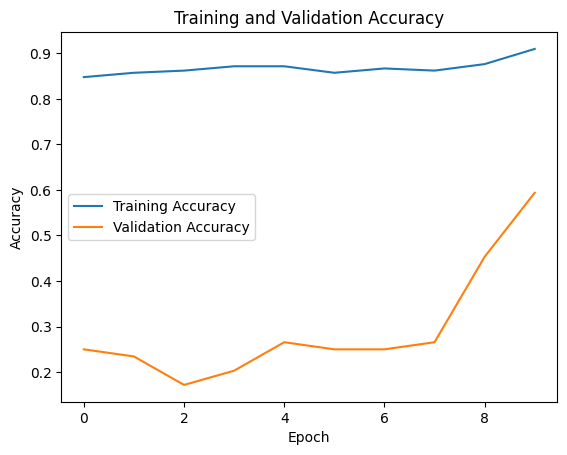

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

In [22]:
test_loss, test_acc = model.evaluate(validation_generator, verbose=2)
print('Test accuracy:', test_acc)

3/3 - 3s - loss: 1.3721 - accuracy: 0.5904 - 3s/epoch - 1s/step
Test accuracy: 0.5903614163398743


In [28]:
# Load the trained model
model = load_model('product_defect_detection_model.h5')

# Define a function for real-time inference
def predict_defect(image_path):
    img = image.load_img("/content/drive/MyDrive/test/broken_small/001.png", target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.

    prediction = model.predict(img_array)
    defect_classes = ['broken_large', 'broke_small', 'contaminous', 'good']
    predicted_class = defect_classes[np.argmax(prediction)]

    return predicted_class

# Simulate real-time data input (replace this with actual data acquisition)
def simulate_production_line():
    # Simulate image paths, replace these with actual image paths
    image_paths = ['path_to_image1.jpg', 'path_to_image2.jpg', 'path_to_image3.jpg']

    for img_path in image_paths:
        predicted_class = predict_defect(img_path)
        print(f"Image: {img_path} | Predicted Defect Class: {predicted_class}")
        time.sleep(1)  # Simulate processing time

# Run the production line simulation
simulate_production_line()

# Assume feedback collection and model iteration happen separately based on collected data
# For simplicity, this example does not include the actual feedback loop implementation


1/1 [==============================] - 0s 374ms/step
Image: path_to_image1.jpg | Predicted Defect Class: broke_small
1/1 [==============================] - 0s 33ms/step
Image: path_to_image2.jpg | Predicted Defect Class: broke_small
1/1 [==============================] - 0s 55ms/step
Image: path_to_image3.jpg | Predicted Defect Class: broke_small
